In [8]:
from resnetm import resnet
from dataset import dataset
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from random import shuffle
import keras
from keras.models import Model, load_model
import matplotlib.pyplot as plt 

In [2]:
# data agumentaion
data = dataset()
data.read_data()
data.crop_image()
yes_img, no_img = data.tranform_for_agumantation()
print("finish agumentation :) ")

finish agumentation :) 


In [3]:
#read data for resnet
y = []

# one hot
for i in range(len(yes_img)) :
    y.append([0,1])
for i in range(len(no_img)) :
    y.append([1,0])

all_img = no_img+yes_img

#splite to train, val, test
X_train, X_test, y_train, y_test = train_test_split(all_img, y, test_size=0.09, shuffle = True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle = True)


X_train = np.array(X_train)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
y_val = np.array(y_val)
X_val = np.array(X_val)
X_train = X_train/255
X_test = X_test/255
X_val = X_val/255

X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape


((955, 64, 64, 3),
 (106, 64, 64, 3),
 (107, 64, 64, 3),
 (955, 2),
 (106, 2),
 (107, 2))

In [12]:
# epoch_loss = []
# class LossAndErrorPrintingCallback(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs=None):
#         epoch_loss.append(logs["loss"])
#         print(
#             "The average loss for epoch {} is {:7.2f} ".format(
#                 epoch, logs["loss"]
#             )
#         )


# creat the resnet model 
resnet_class = resnet()
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
model = resnet_class.build_resnet()
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(X_train, y_train, epochs = 15, validation_data=(X_val,y_val), batch_size = 16, callbacks=[LossAndErrorPrintingCallback()])
model.fit(X_train, y_train, epochs = 40, validation_data=(X_val,y_val), batch_size = 16)
results = model.evaluate(X_train, y_train, batch_size=16, verbose=0)
print("acc in train data :", results[1])
results = model.evaluate(X_test, y_test, batch_size=16, verbose=0)
print("acc in test data :", results[1])
# print(epoch_loss)


Train on 955 samples, validate on 107 samples
Epoch 1/40
955/955 [==============================] - 24s 25ms/step - loss: 0.8300 - accuracy: 0.5225 - val_loss: 0.6936 - val_accuracy: 0.4486
Epoch 2/40
955/955 [==============================] - 21s 22ms/step - loss: 0.6787 - accuracy: 0.5937 - val_loss: 0.6920 - val_accuracy: 0.4579
Epoch 3/40
955/955 [==============================] - 22s 24ms/step - loss: 0.6572 - accuracy: 0.5969 - val_loss: 0.6883 - val_accuracy: 0.4953
Epoch 4/40
955/955 [==============================] - 22s 23ms/step - loss: 0.6511 - accuracy: 0.5937 - val_loss: 0.6862 - val_accuracy: 0.5140
Epoch 5/40
955/955 [==============================] - 21s 22ms/step - loss: 0.6354 - accuracy: 0.6199 - val_loss: 0.6829 - val_accuracy: 0.4766
Epoch 6/40
955/955 [==============================] - 22s 23ms/step - loss: 0.6305 - accuracy: 0.6335 - val_loss: 0.6806 - val_accuracy: 0.5140
Epoch 7/40
955/955 [==============================] - 21s 22ms/step - loss: 0.6126 - accur

1 conv2d_28 (None, 29, 29, 32)
4 conv2d_29 (None, 29, 29, 64)
6 conv2d_30 (None, 29, 29, 1)
10 conv2d_31 (None, 13, 13, 64)
13 conv2d_32 (None, 13, 13, 128)
15 conv2d_33 (None, 13, 13, 1)
19 conv2d_34 (None, 6, 6, 128)
22 conv2d_35 (None, 6, 6, 256)
24 conv2d_36 (None, 6, 6, 1)


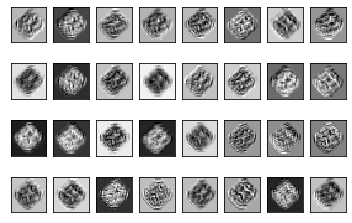

In [13]:
# feature map
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue
    print(i, layer.name, layer.output.shape)

model1 = Model(inputs=model.inputs, outputs=model.layers[1].output)
img = X_train[3].reshape(1,64,64,3)
feature_maps = model1.predict(img)
square = 8
ix = 1
for _ in range(4):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(4, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1


In [ ]:
# plt.plot([i for i in range(80)], epoch_loss, label = "no batchNormalization & drop out")
# plt.plot([i for i in range(80)], epoch_loss_b, label = "no drop out")
# plt.plot([i for i in range(80)], epoch_loss_d, label = "no batchNormalization")
# # plt.plot([i for i in range(10)], all_acc_train_d, label = "with drop out")
# plt.plot([i for i in range(80)], epoch_loss_b_d, label = "with both") 
# # plt.plot([i for i in range(10)], all_acc_train_b_d) 
# plt.xlabel('epoch') 
# plt.ylabel('loss')
# # print(all_acc_test_b)
# plt.legend(loc="upper right")
# plt.title('loss') 
# plt.savefig("l.jpg")
# plt.show() 
